## Adding all the imports

In [163]:
import sys
import os
sys.path.append(os.path.dirname(os.getcwd()))
import importlib
from helpers import collect_data
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
importlib.reload(collect_data)
from helpers.collect_data import get_data
from feature_engineering.clean_data import clean_data
import pandas as pd

## Getting the dataframe

In [140]:
df = get_data()

Fetching data from Binance...


## Descriptive statistics

In [141]:
df.describe()

,timestamp,open,high,low,close,volume
count,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2025-04-10 18:36:30,80208.869390,80255.012060,80160.328030,80207.114920,26.111821
min,2025-04-10 10:17:00,78503.990000,78700.000000,78464.360000,78504.000000,0.392670
25%,2025-04-10 14:26:45,79524.477500,79569.000000,79489.910000,79524.470000,8.285697
50%,2025-04-10 18:36:30,79781.300000,79820.325000,79762.190000,79781.305000,14.995830
75%,2025-04-10 22:46:15,81168.642500,81231.920000,81091.235000,81156.995000,30.183072
max,2025-04-11 02:56:00,82375.990000,82466.350000,82106.000000,82380.000000,462.738160
std,NaN,966.143687,962.491488,967.330102,964.378991,36.214470


#### Last 5 registers

In [142]:
df.tail()

,timestamp,open,high,low,close,volume
995,2025-04-11 02:52:00,80439.57,80439.57,80396.62,80410.05,3.68498
996,2025-04-11 02:53:00,80410.05,80410.06,80391.30,80392.75,2.66430
997,2025-04-11 02:54:00,80392.75,80392.75,80347.03,80347.04,15.26144
998,2025-04-11 02:55:00,80347.04,80361.66,80337.13,80337.14,20.46687
999,2025-04-11 02:56:00,80337.14,80337.14,80298.66,80322.64,24.41979


#### Correlation between variables

In [143]:
df.corr()

,timestamp,open,high,low,close,volume
timestamp,1.000000,-0.639750,-0.648465,-0.627368,-0.637371,-0.209075
open,-0.639750,1.000000,0.998403,0.998303,0.996727,-0.027625
high,-0.648465,0.998403,1.000000,0.997726,0.998442,-0.005611
low,-0.627368,0.998303,0.997726,1.000000,0.998554,-0.050795
close,-0.637371,0.996727,0.998442,0.998554,1.000000,-0.031070
volume,-0.209075,-0.027625,-0.005611,-0.050795,-0.031070,1.000000


#### Covariance between variables

In [144]:
df.cov()

,timestamp,open,high,low,close,volume
timestamp,3.003000e+26,-1.071100e+16,-1.081587e+16,-1.051659e+16,-1.065167e+16,-1.312083e+14
open,-1.071100e+16,9.334336e+05,9.284199e+05,9.329941e+05,9.286795e+05,-9.665626e+02
high,-1.081587e+16,9.284199e+05,9.263899e+05,9.289298e+05,9.267602e+05,-1.955703e+02
low,-1.051659e+16,9.329941e+05,9.289298e+05,9.357275e+05,9.315237e+05,-1.779423e+03
close,-1.065167e+16,9.286795e+05,9.267602e+05,9.315237e+05,9.300268e+05,-1.085093e+03
volume,-1.312083e+14,-9.665626e+02,-1.955703e+02,-1.779423e+03,-1.085093e+03,1.311488e+03


##### Making an histogram

In [145]:
def plot_individual_histograms(df, bins=20):
    # Check if the DataFrame contains numeric columns
    numeric_columns = df.select_dtypes(include=['number']).columns
    
    if len(numeric_columns) == 0:
        print("No numeric columns available for histogram.")
        return

    # Plot individual histograms for each numeric column
    for column in numeric_columns:
        plt.figure(figsize=(6, 4))  # Set the figure size for each plot
        sns.histplot(df[column], kde=True, bins=bins)
        plt.title(f"Histogram of {column}")
        plt.xlabel(column)
        plt.ylabel("Frequency")
        plt.grid(True)
        plt.show()

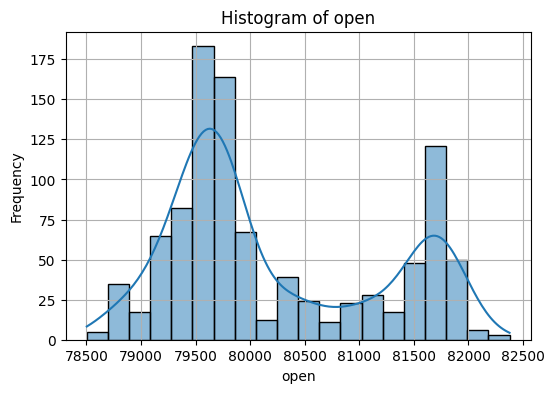

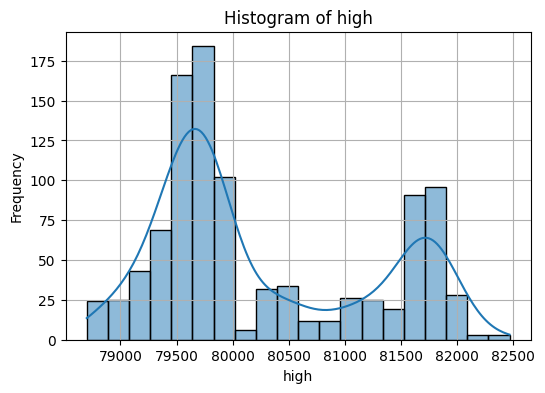

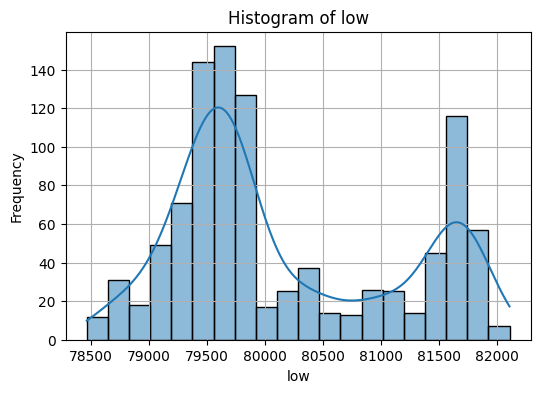

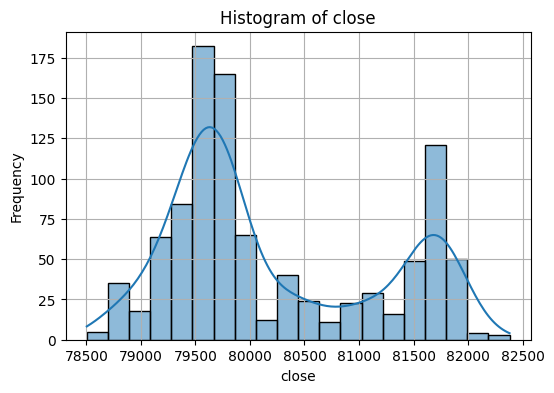

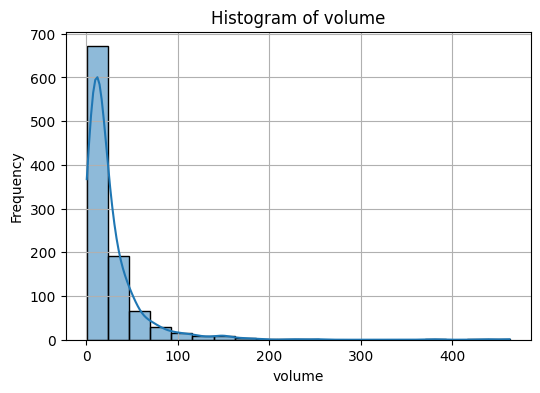

In [146]:
plot_individual_histograms(df, bins=20)

##### Line chart to represent values over the time

In [147]:
def plot_line_chart(df):
    # Ensure 'timestamps' exists and is a datetime type
    if 'timestamp' not in df.columns:
        print("The DataFrame does not contain a 'timestamp' column.")
        return
    
    if not pd.api.types.is_datetime64_any_dtype(df['timestamp']):
        try:
            df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d %H:%M:%S')
        except Exception as e:
            print(f"Error converting 'timestamp' to datetime: {e}")
            return

    # Select numeric columns
    numeric_columns = df.select_dtypes(include='number').columns
    
    if len(numeric_columns) == 0:
        print("No numeric columns available to plot.")
        return

    # Plot each numeric column as a line over time
    for column in numeric_columns:
        plt.figure(figsize=(8, 4))
        sns.lineplot(x='timestamp', y=column, data=df)
        plt.title(f"Line Chart of {column}")
        plt.xlabel("Timestamp")
        plt.ylabel(column)
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.tight_layout()
        plt.show()

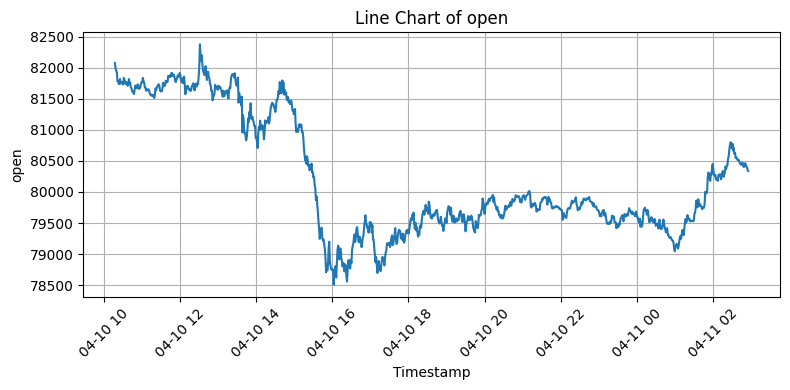

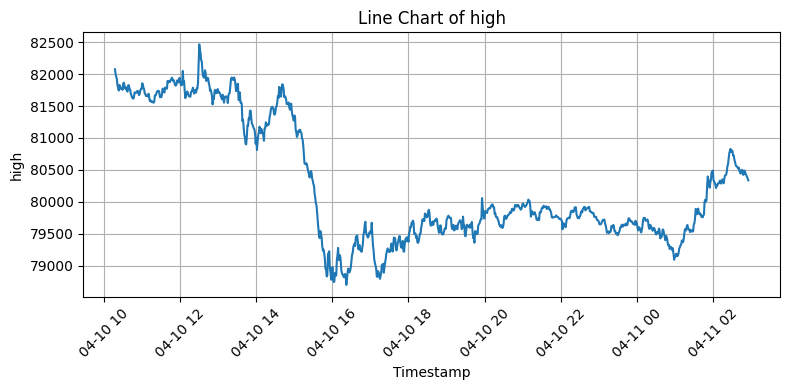

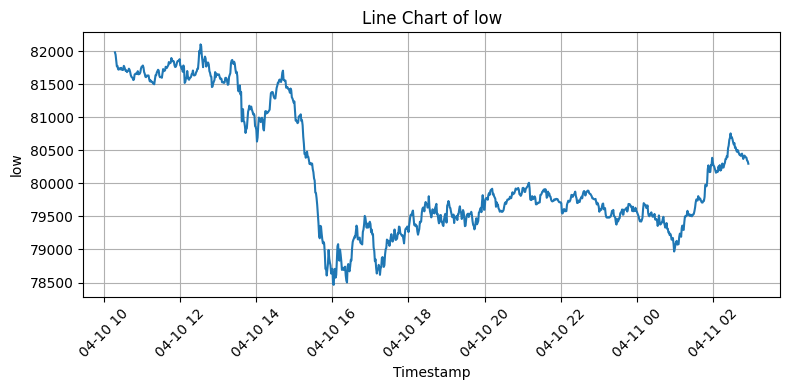

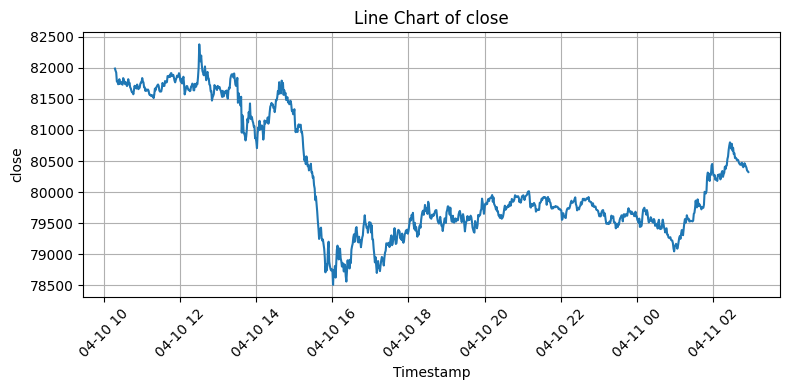

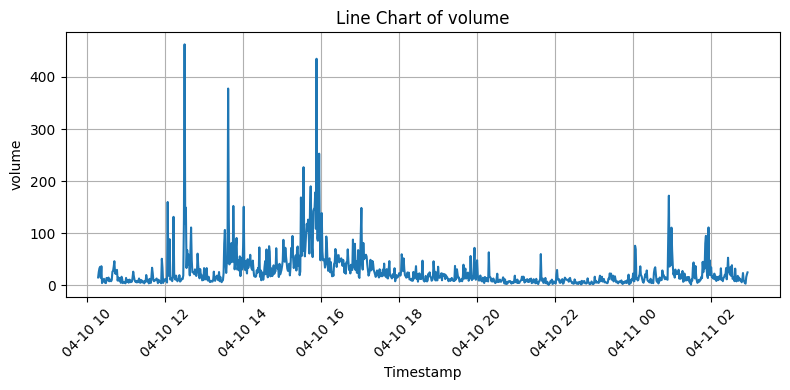

In [148]:
plot_line_chart(df)

## Data Cleaning and Preparation

#### NaN values

In [149]:
df.isnull().sum()

timestamp    0
open         0
high         0
low          0
close        0
volume       0
dtype: int64

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  1000 non-null   datetime64[ns]
 1   open       1000 non-null   float64       
 2   high       1000 non-null   float64       
 3   low        1000 non-null   float64       
 4   close      1000 non-null   float64       
 5   volume     1000 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 47.0 KB


<Axes: >

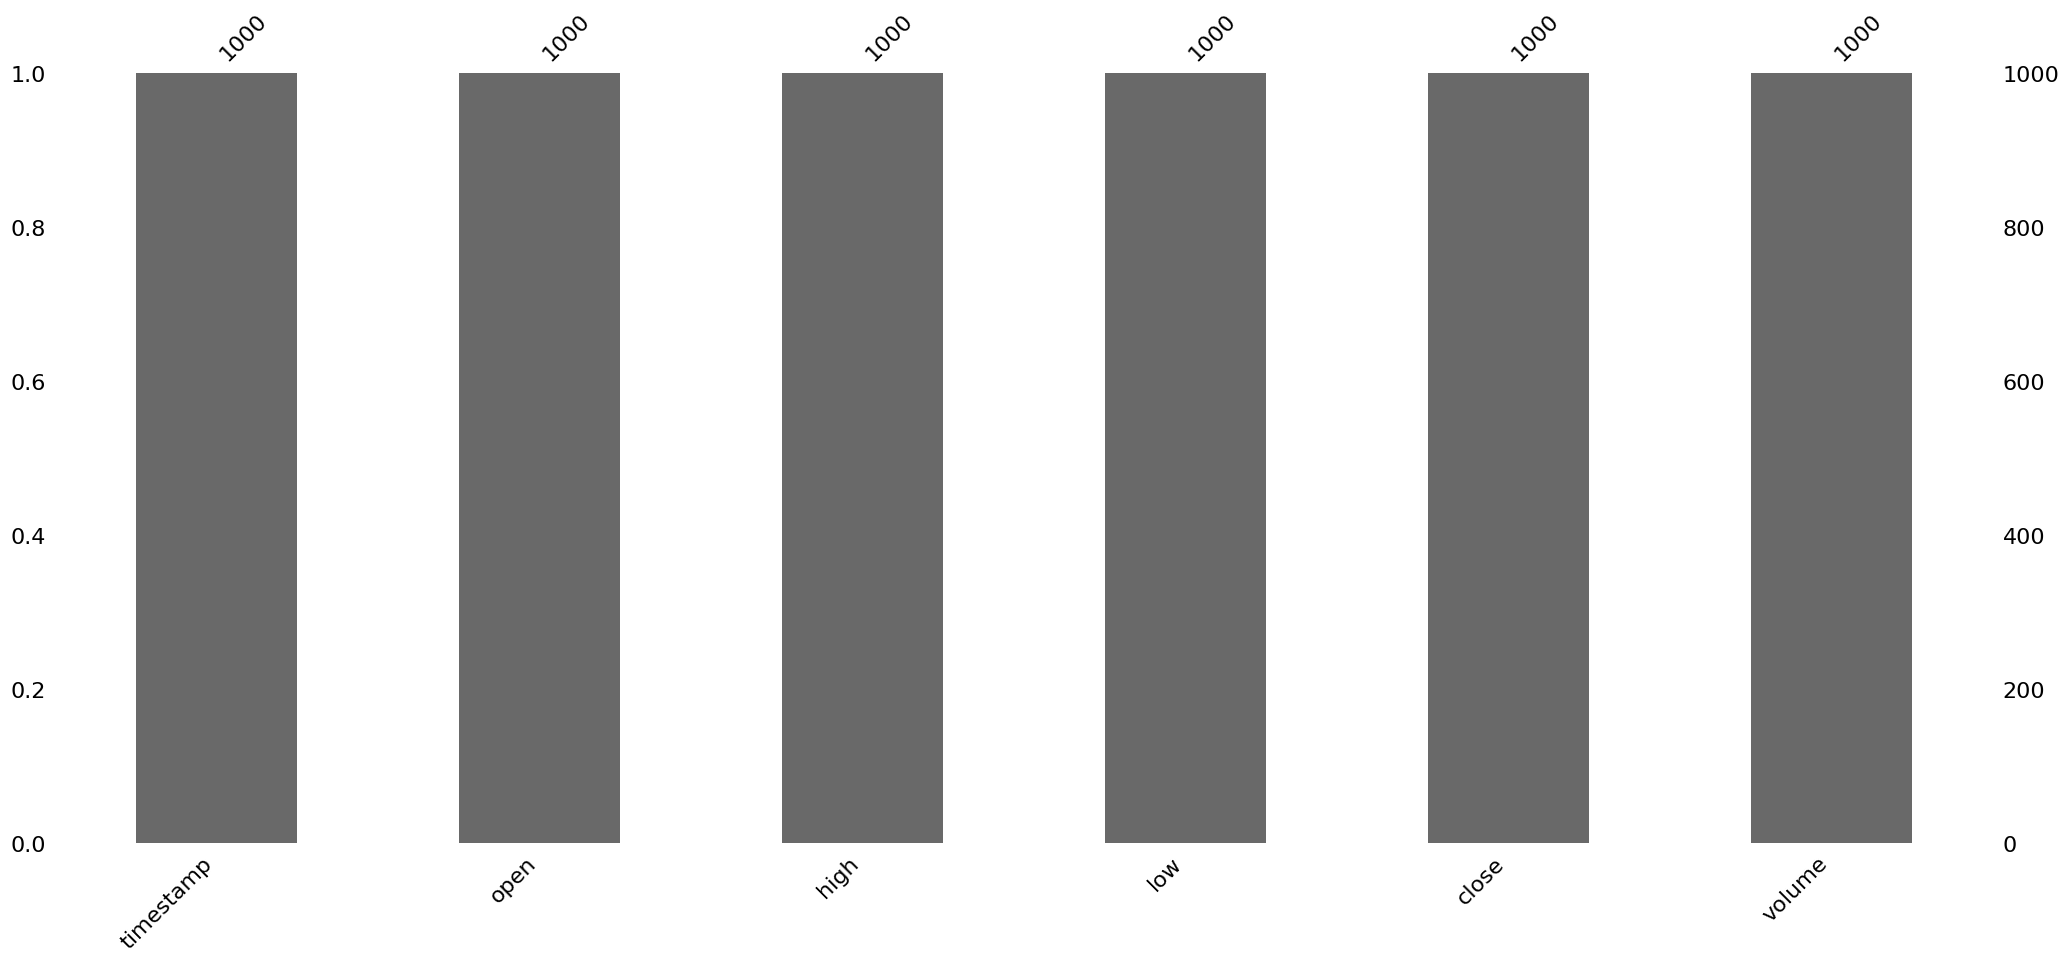

In [151]:
msno.bar(df)

In [152]:
#msno.heatmap(df)

##### The heatmap function shows that there are no strong correlations between missing values of different features. This is good; low correlations further indicate that the data are MAR.

In [153]:
#msno.dendrogram(df)

##### When collectin the data from Binance, we get open, timestamp, high, low, close, volume. 
##### We compute the indicators sma_50, sma_200, ema_10, rsi, macd, macd_signal, macd_histogram. Based on the values from binance
##### Label is being created based on (df["sma_50"] > df["sma_200"]) & (df["rsi"] > 50).

##### How this works from 1000 registers we calculate sma_200 based on 200 values. Thats why there are only 801 rows that has sma_200, is the same to sma_50 = 951, ema_10 = 991, rsi = 987

In [154]:
## Dropping na, i think is not necessary to use the mean to replace na
df.dropna(inplace=True)

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  1000 non-null   datetime64[ns]
 1   open       1000 non-null   float64       
 2   high       1000 non-null   float64       
 3   low        1000 non-null   float64       
 4   close      1000 non-null   float64       
 5   volume     1000 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 47.0 KB


### Duplicate values

In [156]:
df.duplicated().sum()

np.int64(0)

#### No checking for Inconsistent Data based, no necessary

### Checking outliers

In [157]:
def plot_individual_boxplots(df):
    # Check if the DataFrame contains numeric columns
    numeric_columns = df.select_dtypes(include=['number']).columns
    
    if len(numeric_columns) == 0:
        print("No numeric columns available for boxplot.")
        return
    
    # Plot individual boxplots for each numeric column
    for column in numeric_columns:
        plt.figure(figsize=(6, 4))  # Set the figure size for each plot
        sns.boxplot(x=df[column])
        plt.title(f"Boxplot of {column}")
        plt.show()

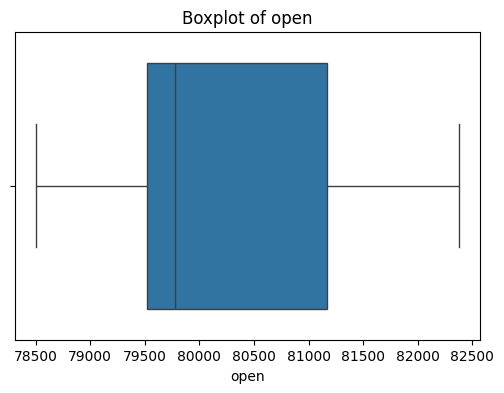

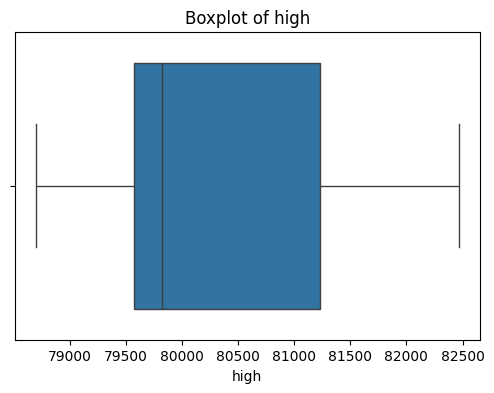

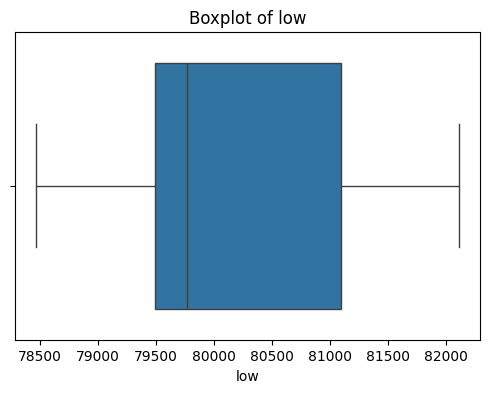

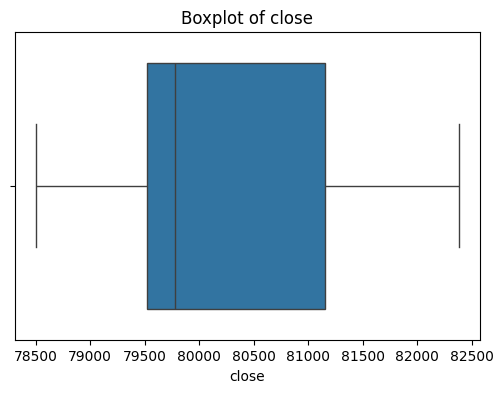

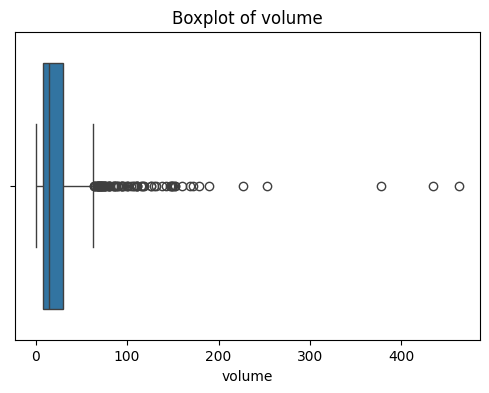

In [158]:
plot_individual_boxplots(df)

#### Imputing outliers using the IQR method and setting the mean

In [159]:
def handle_outliers_iqr(df):
    # Check if the DataFrame contains numeric columns
    numeric_columns = df.select_dtypes(include=['number']).columns
    
    if len(numeric_columns) == 0:
        print("No numeric columns available for outlier handling.")
        return df
    
    # Handle outliers using the IQR method and impute with the mean
    for column in numeric_columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Identify outliers
        outliers = (df[column] < lower_bound) | (df[column] > upper_bound)
        
        # Impute outliers with the column mean
        mean_value = df[column].mean()
        df[column] = df[column].where(~outliers, mean_value)
    
    return df

In [160]:
df = handle_outliers_iqr(df)

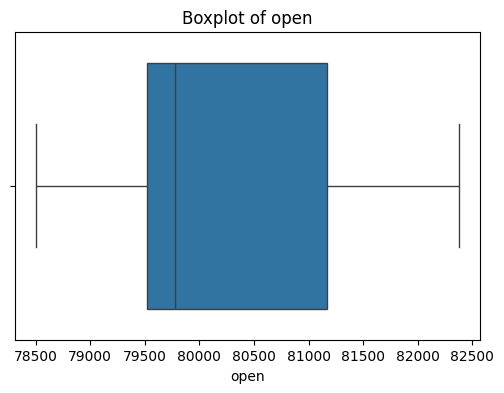

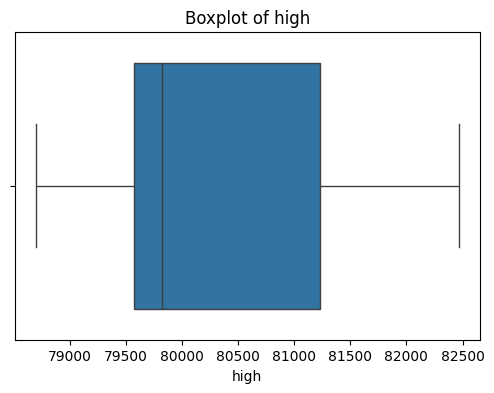

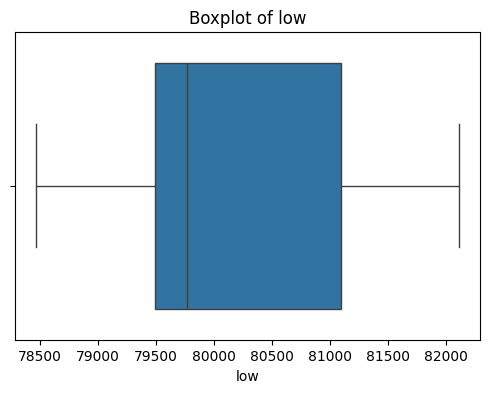

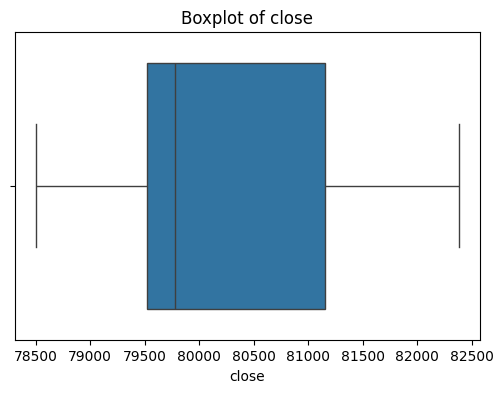

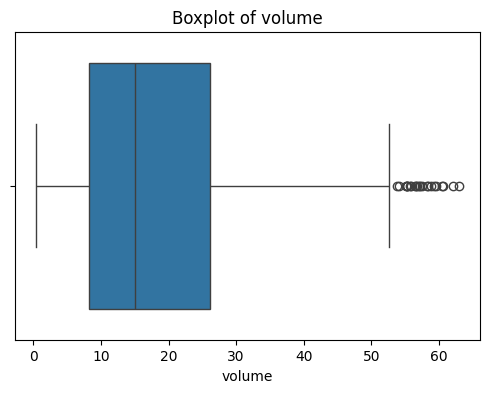

In [161]:
plot_individual_boxplots(df)

### Check data types

In [162]:
df.dtypes

timestamp    datetime64[ns]
open                float64
high                float64
low                 float64
close               float64
volume              float64
dtype: object

##### No incorrect data types

### No need to encoding categorical variables